In [143]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [144]:
def tonality_PCs_complition(G):
    additions = {}
    for n in G.nodes():
        if '_CHORD' in n:
            # get descendants
            c = nx.descendants(G, n)
            # get root and type rpcs
            r = -1
            type_rpcs = []
            for d in c:
                if '_ROOT_PC:' in d:
                    r = int(d.split('_ROOT_PC:')[1])
                if '_TYPE_PC:' in d:
                    type_rpcs.append( int(d.split('_TYPE_PC:')[1]) )
            if r > -1 and len(type_rpcs) > 0:
                chord_pcs = [r]
                for t in type_rpcs:
                    chord_pcs.append( (r + t)%12 )
                additions[n] = chord_pcs
    # pass additions to identified chord
    for k in additions.keys():
        for v in additions[k]:
            tmp_node_name = '_TONALITY_PC:' + str(v)
            G.add_node( tmp_node_name )
            G.add_edge( k, tmp_node_name, label='_HAS_TONALITY_PC' )
# end tonality_PCs_complition

In [145]:
perfect_df = pd.read_csv('perfect_graph.csv')
print(perfect_df.head())

                   head      relation                  tail
0          _CAD:Perfect          _HAS  _CHORD_1st:dominant7
1          _CAD:Perfect          _HAS        _CHORD_2nd:maj
2  _CHORD_1st:dominant7  _HAS_ROOT_PC            _ROOT_PC:7
3  _CHORD_1st:dominant7     _HAS_TYPE       _TYPE:dominant7
4       _TYPE:dominant7  _HAS_TYPE_PC            _TYPE_PC:4


In [146]:
phrygian_df = pd.read_csv('phrygian_graph.csv')
print(phrygian_df.head())

             head      relation            tail
0   _CAD:Phrygian          _HAS  _CHORD_1st:min
1   _CAD:Phrygian          _HAS  _CHORD_2nd:min
2  _CHORD_1st:min  _HAS_ROOT_PC     _ROOT_PC:10
3  _CHORD_1st:min     _HAS_TYPE       _TYPE:min
4       _TYPE:min  _HAS_TYPE_PC      _TYPE_PC:3


In [147]:
# Create a knowledge graph
G_perfect = nx.DiGraph()
for _, row in perfect_df.iterrows():
    G_perfect.add_edge(row['head'], row['tail'], label=row['relation'])

In [148]:
# Create a knowledge graph
G_phrygian = nx.DiGraph()
for _, row in phrygian_df.iterrows():
    G_phrygian.add_edge(row['head'], row['tail'], label=row['relation'])

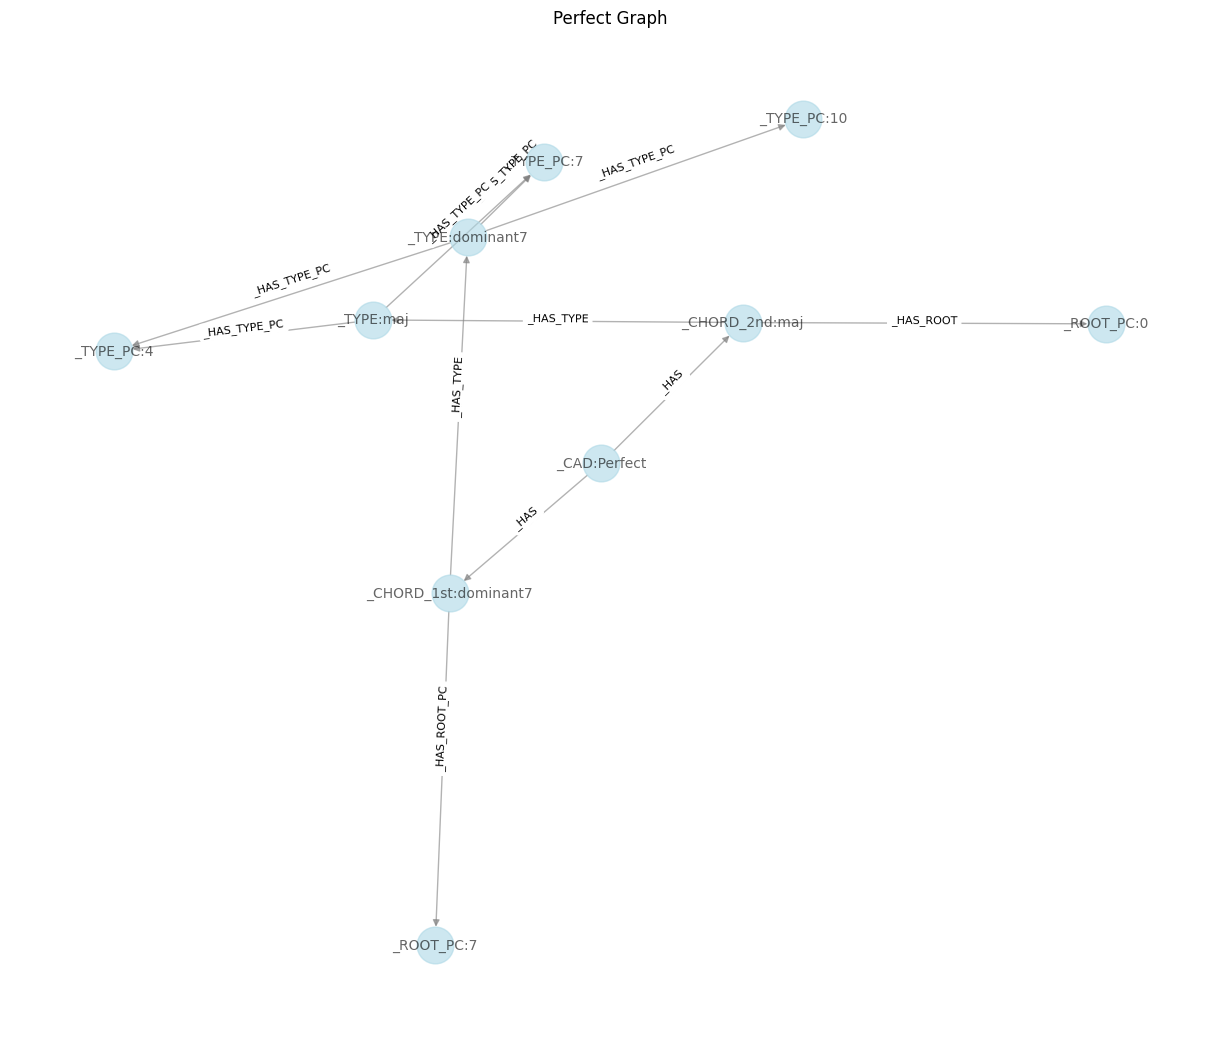

In [149]:
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_perfect)
labels = nx.get_edge_attributes(G_perfect, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_perfect, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_perfect, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Perfect Graph')
plt.show()

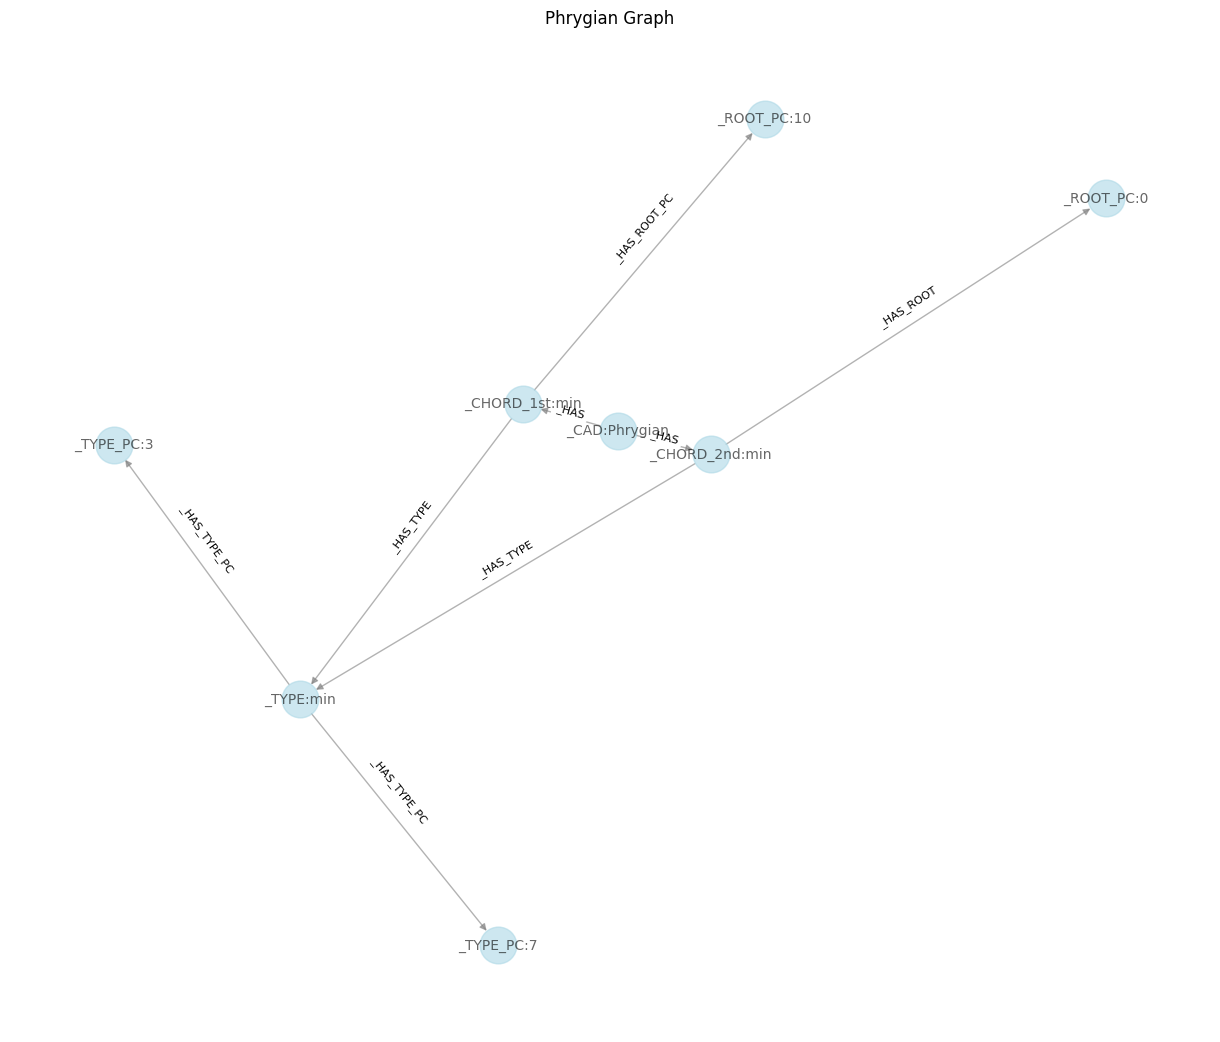

In [150]:
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_phrygian)
labels = nx.get_edge_attributes(G_phrygian, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_phrygian, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_phrygian, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Phrygian Graph')
plt.show()

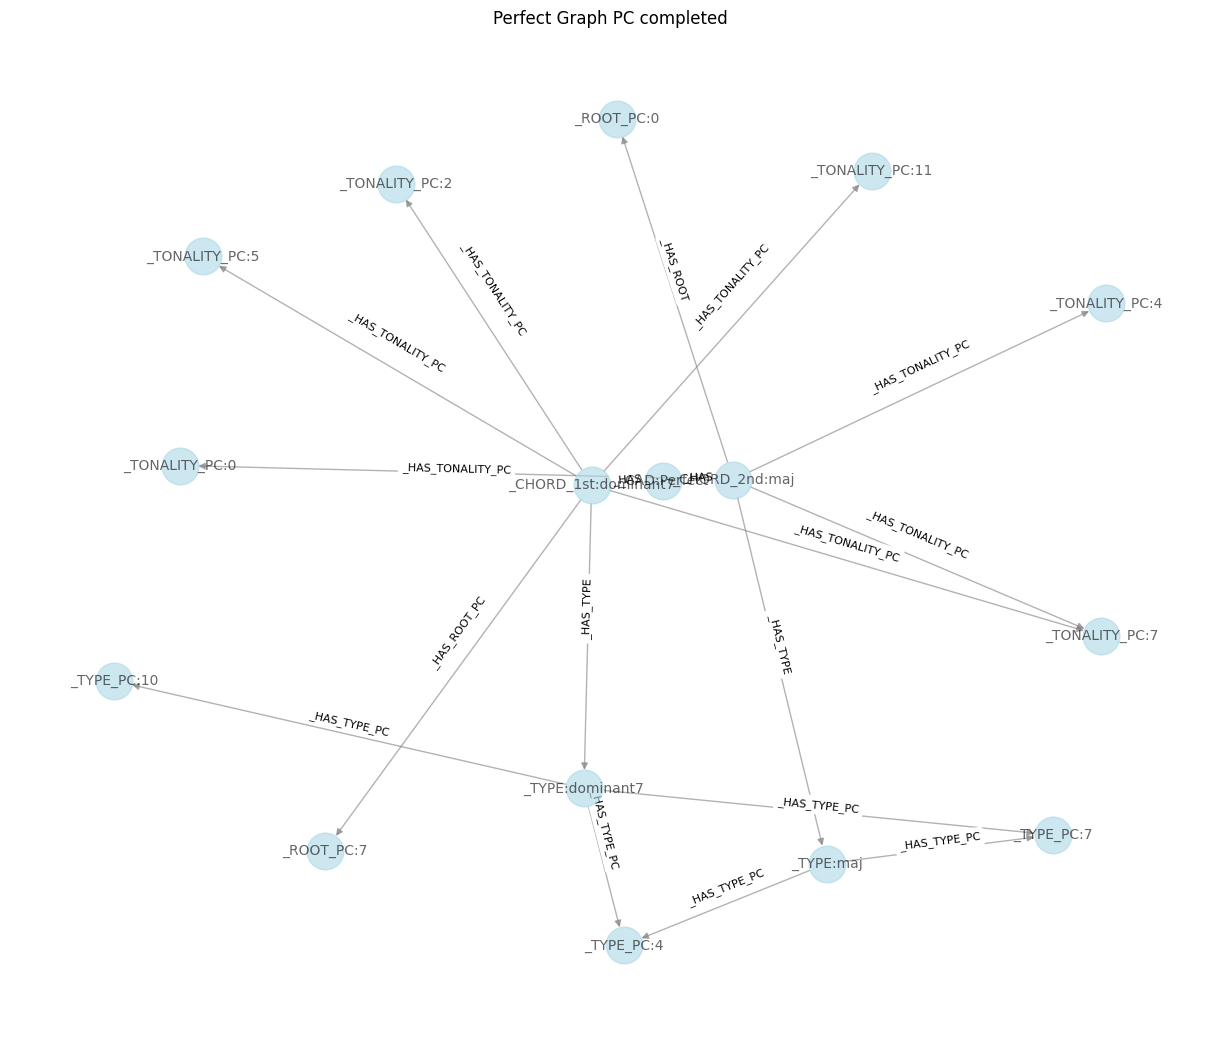

In [151]:
# tonality complition
tonality_PCs_complition(G_perfect)
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_perfect)
labels = nx.get_edge_attributes(G_perfect, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_perfect, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_perfect, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Perfect Graph PC completed')
plt.show()

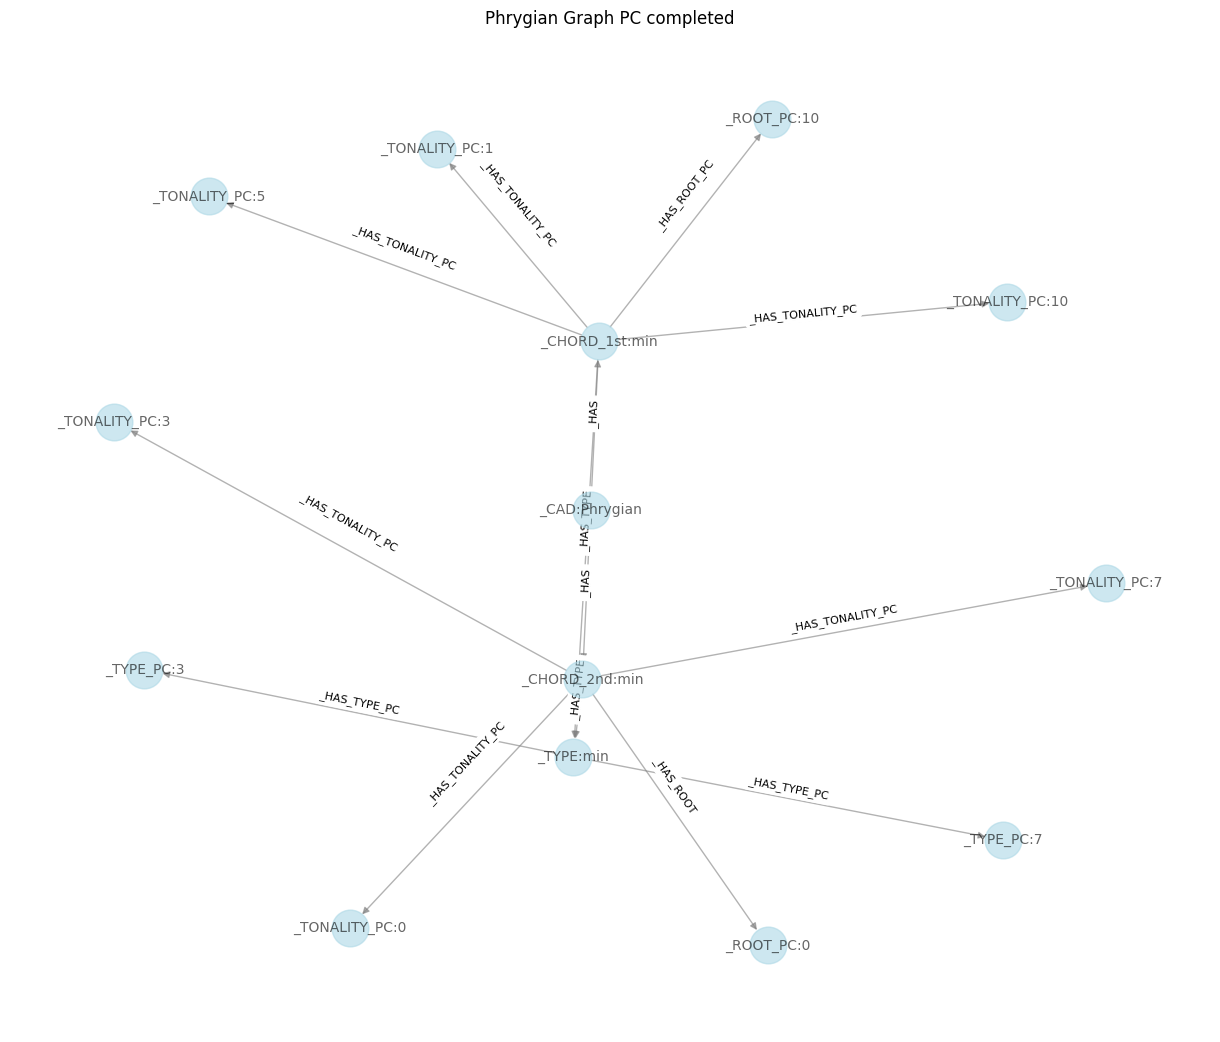

In [152]:
# tonality complition
tonality_PCs_complition(G_phrygian)
# Visualize the knowledge graph
# pos = nx.spring_layout(G, seed=42, k=0.9)
pos = nx.spring_layout(G_phrygian)
labels = nx.get_edge_attributes(G_phrygian, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_phrygian, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G_phrygian, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Phrygian Graph PC completed')
plt.show()

In [153]:
# intersection
I_perfect_phrygian = nx.intersection(G_perfect, G_phrygian)

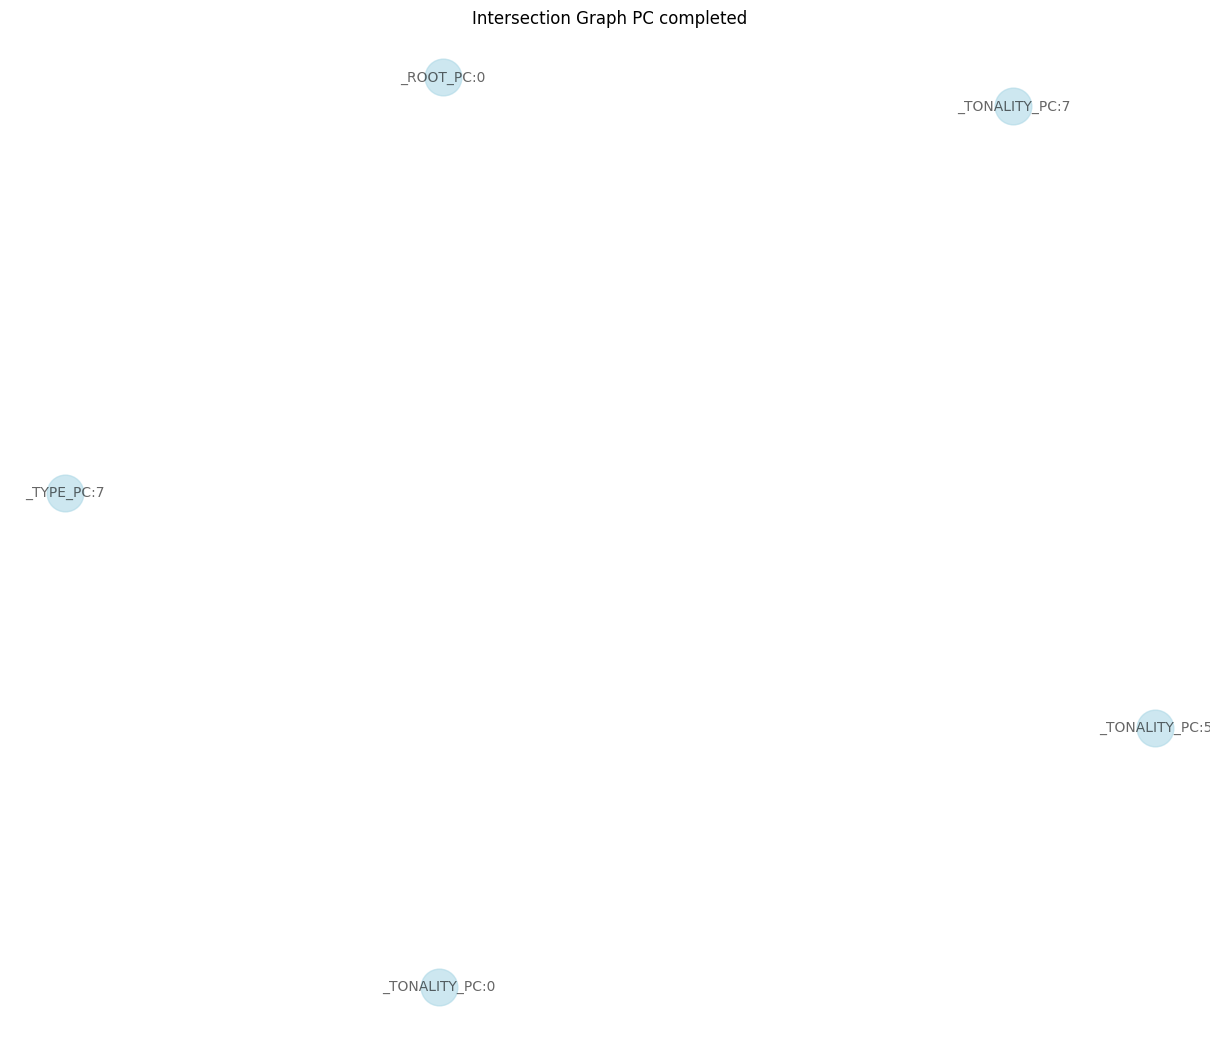

In [154]:
pos = nx.spring_layout(I_perfect_phrygian)
labels = nx.get_edge_attributes(I_perfect_phrygian, 'label')
plt.figure(figsize=(12, 10))
nx.draw(I_perfect_phrygian, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(I_perfect_phrygian, pos, edge_labels=labels, font_size=8, label_pos=0.5, verticalalignment='baseline')
plt.title('Intersection Graph PC completed')
plt.show()